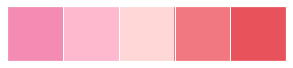

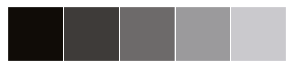

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy
sns.set() 
color_mix = ['#F38BB2', '#FFB9CF', '#FFD7D7', '#F17881', '#E7525B']
sns.palplot(color_mix)
black_grad = ['#100C07', '#3E3B39', '#6D6A6A', '#9B9A9C', '#CAC9CD']
sns.palplot(black_grad)

# outline 

In [2]:
heart_df=pd.read_csv("heart.csv")
heart_df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
heart_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart_df.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


# Howa many rows and coloums

In [5]:
heart_df.shape

(303, 14)

# Describtion

In [6]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [24]:
heart_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


# Counting the Empty cells

In [8]:
heart_df.isnull().sum()


age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

# Knowing the type of each coloum

In [9]:
heart_df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

# How many Males and Females

In [10]:
heart_df["sex"] = heart_df["sex"].map({0:"Female", 1:"Male"})
heart_df["sex"].agg(["value_counts"])

,value_counts
Male,207
Female,96


# Pie chart of the Distribution of Numbers of Male And Females

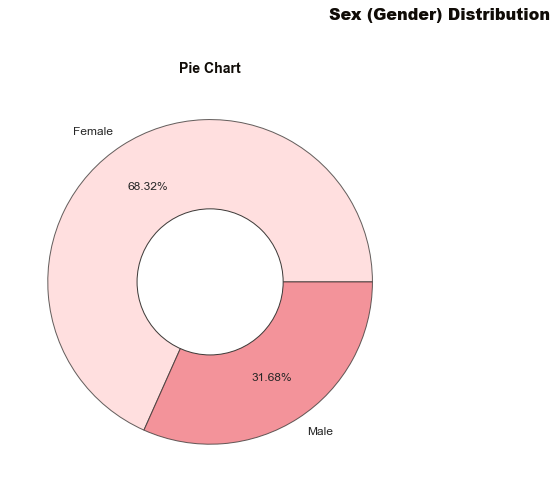

In [11]:
colors=color_mix[2:4]
labels=['Female', 'Male']
order=heart_df['sex'].value_counts().index
plt.figure(figsize=(16, 8))
plt.suptitle('Sex (Gender) Distribution', fontweight='heavy', 
fontsize='16', fontfamily='sans-serif', color=black_grad[0])
#Pie Chart
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14,
fontfamily='sans-serif', color=black_grad[0])
plt.pie(heart_df['sex'].value_counts(), labels=labels, colors=colors, pctdistance=0.7,
autopct='%.2f%%', wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]),
textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)


# pie chart of Fasting Blood Sugar Distribution

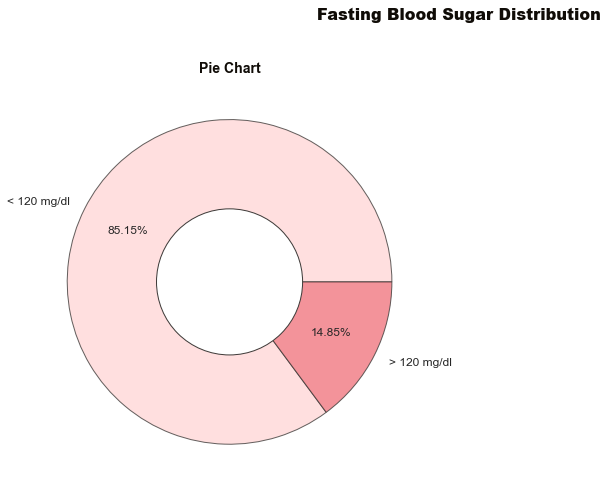

In [12]:
colors=color_mix[2:4]
labels=['< 120 mg/dl', '> 120 mg/dl']
order=heart_df['fbs'].value_counts().index
plt.figure(figsize=(16, 8))
plt.suptitle('Fasting Blood Sugar Distribution', fontweight='heavy', 
fontsize=16, fontfamily='sans-serif', color=black_grad[0])
#Pie Chart
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
color=black_grad[0])
plt.pie(heart_df['fbs'].value_counts(), labels=labels, colors=colors,
wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), autopct='%.2f%%',
pctdistance=0.7, textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)


# pie chart of Resting Electrocardiographic Distribution

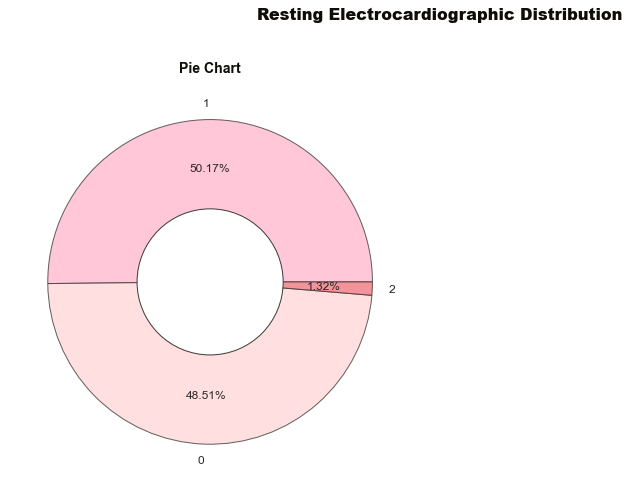

In [13]:
colors=color_mix[1:4]
labels=['1', '0', '2']
order=heart_df['restecg'].value_counts().index
plt.figure(figsize=(16, 8))
plt.suptitle('Resting Electrocardiographic Distribution', fontweight='heavy', 
fontsize=16, fontfamily='sans-serif', color=black_grad[0])
plt.subplot(1,2,1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
color=black_grad[0])
plt.pie(heart_df['restecg'].value_counts(), labels=labels, colors=colors, 
wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), autopct='%.2f%%',
pctdistance=0.7, textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# pie chart of Exercise Induced Angina Distribution

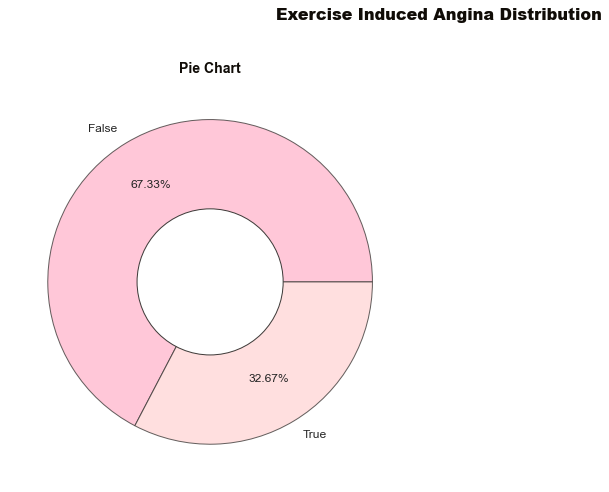

In [14]:
colors=color_mix[1:3]
labels=['False', 'True']
order=heart_df['exng'].value_counts().index
plt.figure(figsize=(16, 8))
plt.suptitle('Exercise Induced Angina Distribution', fontweight='heavy', 
fontsize=16, fontfamily='sans-serif', color=black_grad[0])
plt.subplot(1,2,1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif',
color=black_grad[0])
plt.pie(heart_df['exng'].value_counts(), labels=labels, colors=colors, 
wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), autopct='%.2f%%',
pctdistance=0.7, textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# pie chart of Slope of the Peak Exercise Distribution

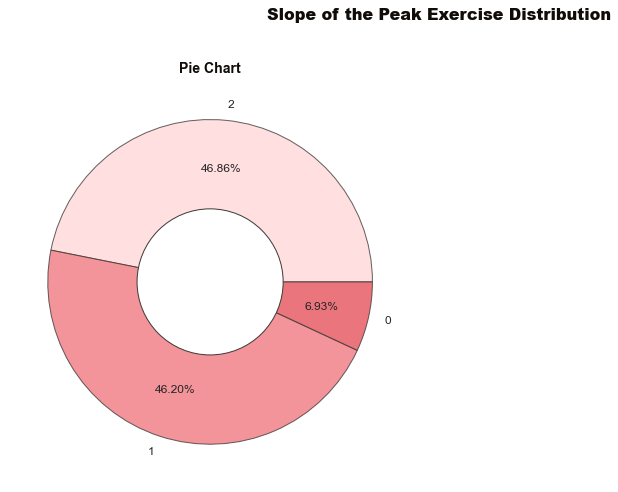

In [15]:
colors=color_mix[2:5]
labels=['2', '1', '0']
order=heart_df['slp'].value_counts().index
plt.figure(figsize=(16, 8))
plt.suptitle('Slope of the Peak Exercise Distribution', fontweight='heavy', 
fontsize=16, fontfamily='sans-serif', color=black_grad[0])
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14,
fontfamily='sans-serif', color=black_grad[0])
plt.pie(heart_df['slp'].value_counts(), labels=labels, colors=colors, 
wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), autopct='%.2f%%',
pctdistance=0.7, textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# pie chart of Number of Major Vessels Distribution

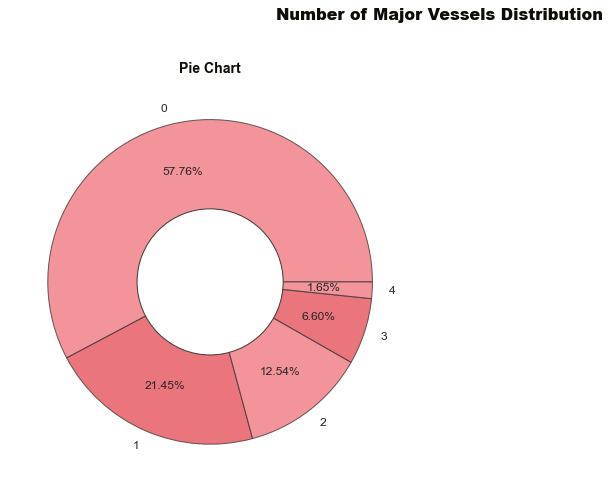

In [25]:
# colors=color_mix
labels=['0', '1', '2', '3', '4']
order=heart_df['caa'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Number of Major Vessels Distribution', fontweight='heavy', 
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1,2,1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif',
          color=black_grad[0])
plt.pie(heart_df['caa'].value_counts(), labels=labels, colors=colors, 
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), 
        autopct='%.2f%%', pctdistance=0.7, textprops={'fontsize':12})

centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)


# pie chart of Heart Diseases Distribution

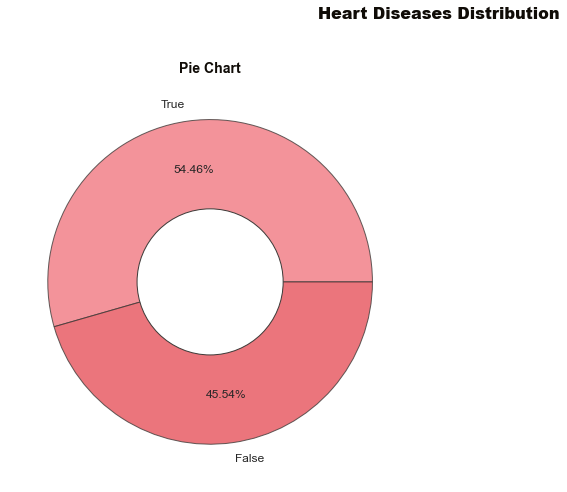

In [17]:
colors=color_mix[3:5]
labels=['True', 'False']
order=heart_df['output'].value_counts().index
plt.figure(figsize=(16,8))
plt.suptitle('Heart Diseases Distribution', fontweight='heavy', 
fontsize=16, fontfamily='sans-serif', color=black_grad[0])
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif',
color=black_grad[0])
plt.pie(heart_df['output'].value_counts(), labels=labels, colors=colors, 
wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), autopct='%.2f%%',
pctdistance=0.7, textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# How many people have good Cholestero

In [18]:
heart_df[heart_df["chol"] >= 45]["chol"].count()

303

# How many people have bad Cholestero

In [22]:
heart_df[heart_df["chol"] < 130]["chol"].count()

1

Text(0.5, 0, 'age')

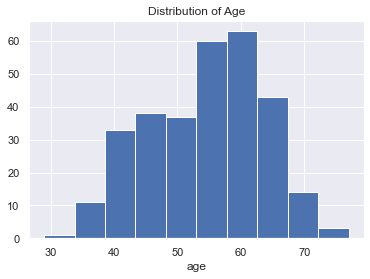

In [20]:
heart_df=pd.read_csv("heart.csv")
heart_df
from matplotlib import pyplot as plt
plt.hist(heart_df["age"])
plt.title("Distribution of Age")
plt.xlabel("age")

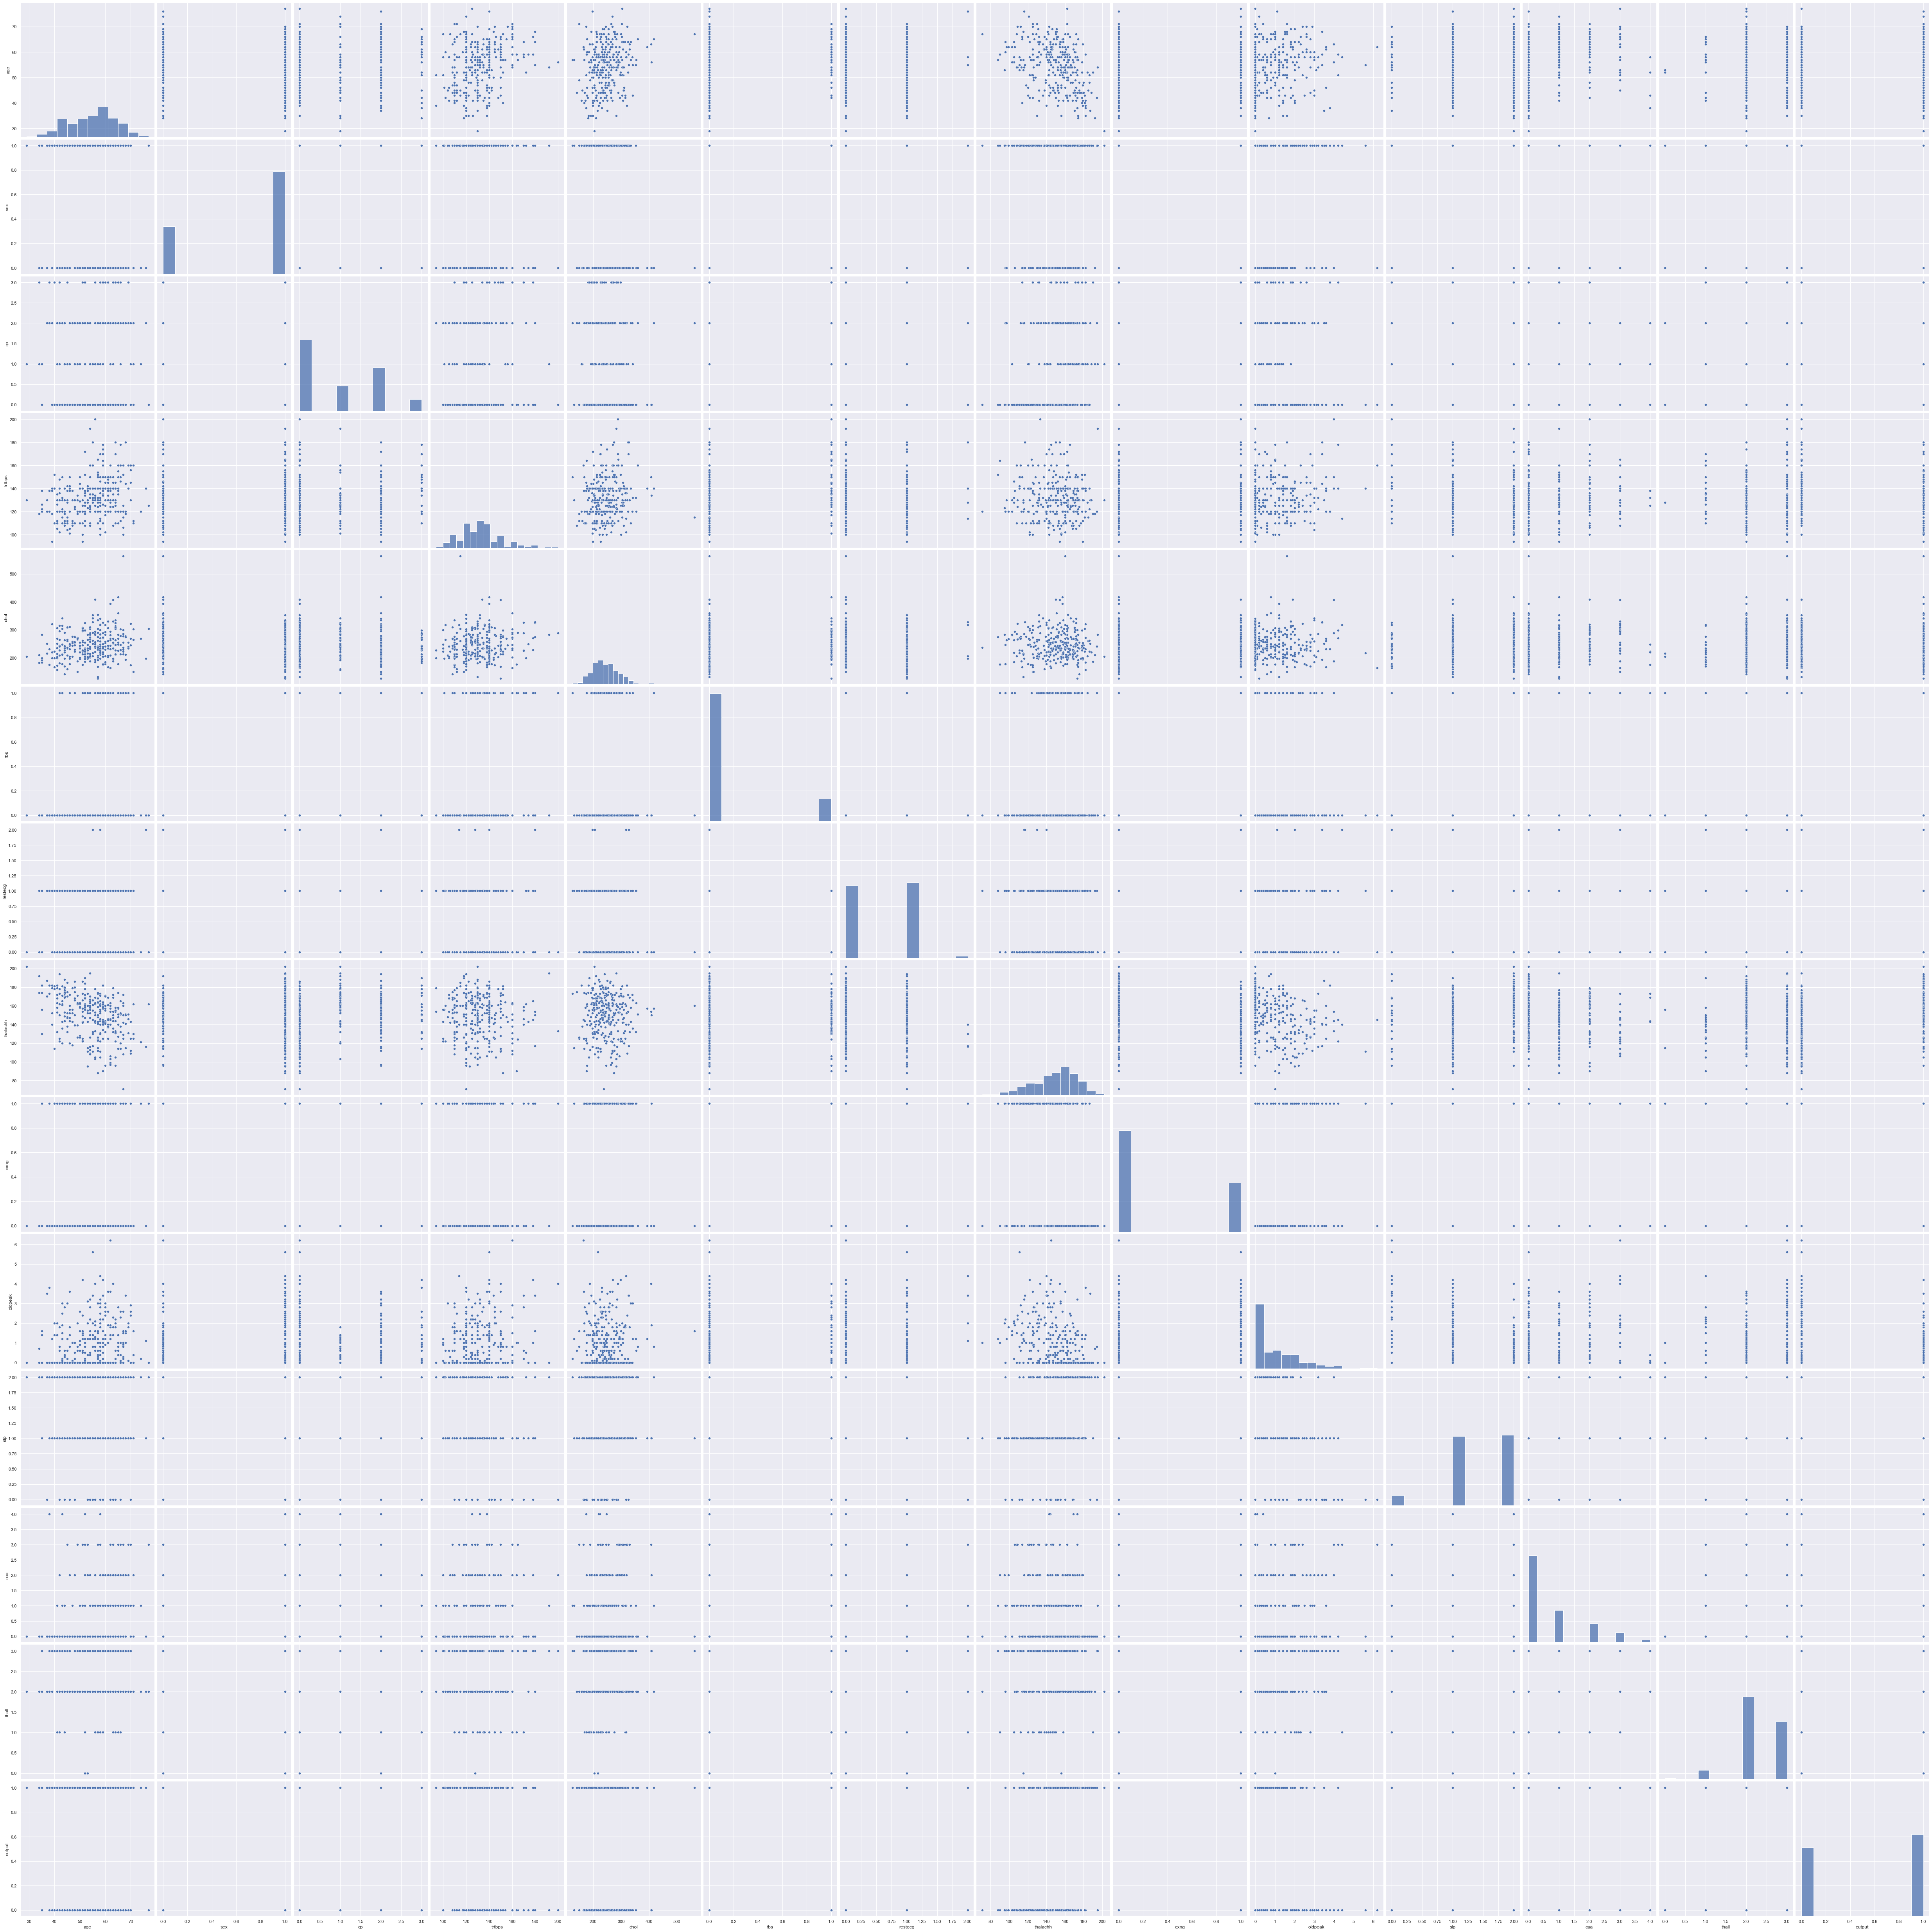

In [23]:
sns.pairplot(heart_df,height=5)

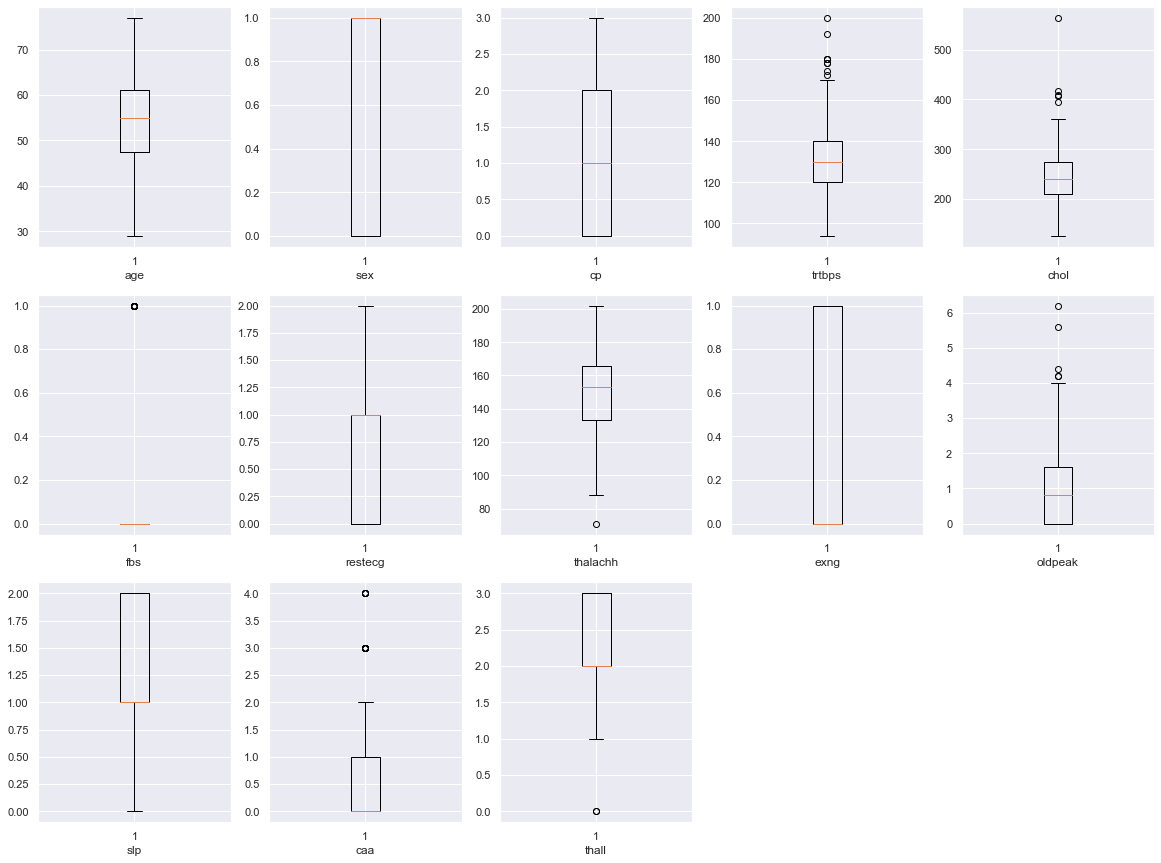

In [31]:
col = 1
plt.figure(figsize = (20, 15))
for i in heart_df.columns:
    if col < 14:
        plt.subplot(3, 5, col)
        plt.boxplot(heart_df[i])
        plt.xlabel(i)
    col = col + 1

from the above graph the age average is 54.4

the average of the chest pain is 1

the average of resting electrocardiographic is 131.62

the average of the cholestroal in mg/dl is 242.26

In [ ]:
the average of resting electrocardiographic is 1